<a href="https://colab.research.google.com/github/akshatjain1003/project/blob/master/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Exploratory Data Anaylysis Of Car Feature***

**TASK 1**


Importing the required libraries

In [794]:
#libraries importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

-> Loading the data into data frame

In [795]:
import pandas as pd
url ='https://raw.githubusercontent.com/akshatjain1003/project/master/data.csv'
df = pd.read_csv(url)
#Dataset is now stored in a Pandas Dataframe

In [796]:
#checking the first- five rows of the given table
df.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [797]:
#to see or check the number of rows as well as columns of the table
df.shape

(11914, 16)

-> Checking the types of data and basic summary stats

In [798]:
#checking the datatype and information of the table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [799]:
#statistics part 
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [800]:
#count the total null values in each column
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [801]:
#count the total null values in whole table
df.isnull().sum().sum()

3850

In [802]:
#show percentage of missing data
df_missing = (df.isnull().sum() / len(df)) * 100
df_missing = df_missing.drop(df_missing[df_missing==0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Percentage' : df_missing})
missing_data

,Missing Percentage
Market Category,31.408427
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
Engine Fuel Type,0.025180


In [803]:
# all the unique brands of vehicles
df.Make.unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [804]:
#no of vehicles underv all brands
df.Make.value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Bugatti   

**TASK 2**


-> Dropping the irrelevant columns

In EDA this step is necessary because there are some columns which are not useful and in such case we use dropping.

In [805]:
#to delete the column which are less relevance
df.drop(['Number of Doors','Market Category'], axis=1,inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**TASK 3**

-> Renaming the column

sometimes,column names can be confusing or not readable so by changing its name as it improves the readability of the data set.

In [806]:
#to rename the some columns
df.rename({'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG':'MPG-H', 'city mpg': 'MPG-C', 'MSRP':'Price'}, axis=1,inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


**TASK 4**

Dropping the duplicates

this is needed because dataset contains more than 10000 rows which have some duplicate data and we have to remove  the duplicates from the data set.

In [807]:
#remove the duplicate
df.drop_duplicates()


,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr Hatchback,23,16,204,50920


In [808]:
#check for duplicates  in the data 
duplicateROW= df[df.duplicated()]
print(duplicateROW)

         Make     Model  Year  ... MPG-C  Popularity  Price
14        BMW  1 Series  2013  ...    19        3916  31500
18       Audi       100  1992  ...    17        3105   2000
20       Audi       100  1992  ...    17        3105   2000
24       Audi       100  1993  ...    17        3105   2000
25       Audi       100  1993  ...    17        3105   2000
...       ...       ...   ...  ...   ...         ...    ...
11481  Suzuki      X-90  1998  ...    22         481   2000
11603   Volvo      XC60  2017  ...    20         870  46350
11604   Volvo      XC60  2017  ...    23         870  40950
11708  Suzuki       XL7  2008  ...    15         481  29149
11717  Suzuki       XL7  2008  ...    16         481  27499

[721 rows x 14 columns]


-> Dropping the null values


this is quiet similar with the previous one but it become more efficient as compared to previous one in this replacing the missing values with the median of the average of particular column this will hepl in the fine tuning of the model performance.

In [809]:
df.isnull().sum()


Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [810]:

df.fillna(df.median(), inplace=True)
print (df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [811]:
# for count the missing values
df=df.dropna()
df.count()

Make                11911
Model               11911
Year                11911
Engine Fuel Type    11911
HP                  11911
Cylinders           11911
Transmission        11911
Drive Mode          11911
Vehicle Size        11911
Vehicle Style       11911
MPG-H               11911
MPG-C               11911
Popularity          11911
Price               11911
dtype: int64

In [812]:
#check for missing values of rows or columns
df = df.fillna(df.mode().iloc[0])
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

**TASK 5**

-> Detecting Outliers

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

The box plot for HP,Popularity,Price,Cylinders,MPG-H,MPG-C are given below.
In these plots you find out some poitns outside the box which are the outliers.


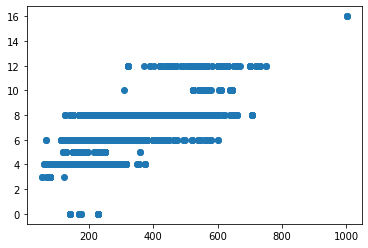

In [813]:
#graph to detect the outliters
plt.scatter(df['HP'],df['Cylinders'])
plt.show()


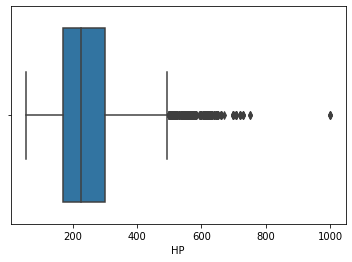

In [814]:
#boxplot for some columns
sns.boxplot(x=df['HP'])


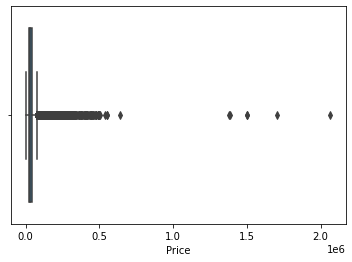

In [815]:
sns.boxplot(x=df['Price'])

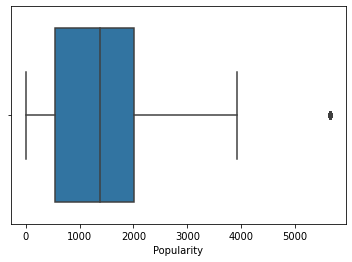

In [816]:
sns.boxplot(x=df['Popularity'])

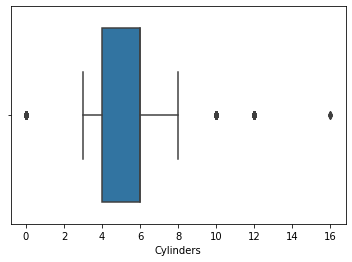

In [817]:
sns.boxplot(x=df['Cylinders'])


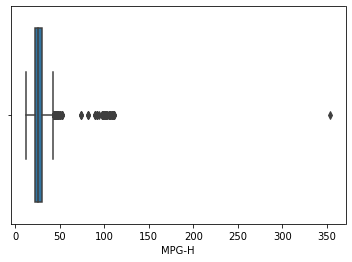

In [818]:
sns.boxplot(x=df['MPG-H'])


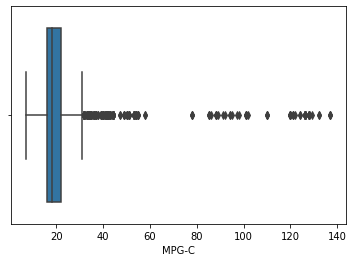

In [819]:
sns.boxplot(x=df['MPG-C'])

In [820]:
# removing of outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21227.5
dtype: float64


In [821]:
df=df[~((df<(Q1 - 1.5 *IQR)) | (df >(Q3+ 1.5 *IQR))).any(axis=1)]
df.shape

(9081, 14)

**TASK 6**

-> The most represented Car brands

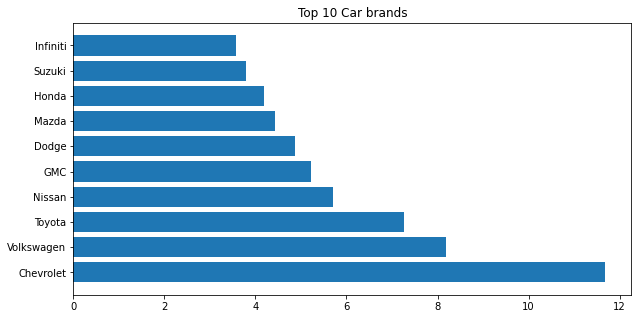

In [822]:
#car percentage on the basis of their brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# top ten car brands
popular_labels=counts.index[:10]


#plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

In [823]:
#prices with their reaspective Car brands
prices = df[['Make' ,'Price']].loc[(df['Make']=='Chevrolet')|
       (df['Make']== 'Ford')|
       (df['Make']== 'Volkswagen')|
       (df['Make']== 'Toyota')|
       (df['Make']== 'Dodge')|
       (df['Make']== 'Nissan')|
       (df['Make']== 'GMC')|
       (df['Make']== 'Honda')|
       (df['Make']== 'Mazda')].groupby('Make').mean()

print(prices)


                   Price
Make                    
Chevrolet   27657.634906
Dodge       25983.345372
GMC         32866.520000
Honda       27511.286842
Mazda       20703.447761
Nissan      28148.655706
Toyota      29223.393020
Volkswagen  28339.133244


**TASK 7**

->Correlation Matrix:

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

In [824]:
#correlation
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330180,-0.103658,0.362706,0.328816,0.202387,0.606209
HP,0.330180,1.000000,0.736957,-0.467502,-0.562064,0.109311,0.739162
Cylinders,-0.103658,0.736957,1.000000,-0.705228,-0.755909,0.029398,0.379249
MPG-H,0.362706,-0.467502,-0.705228,1.000000,0.938856,0.073377,-0.120884
MPG-C,0.328816,-0.562064,-0.755909,0.938856,1.000000,0.064656,-0.192624
Popularity,0.202387,0.109311,0.029398,0.073377,0.064656,1.000000,0.118468
Price,0.606209,0.739162,0.379249,-0.120884,-0.192624,0.118468,1.000000


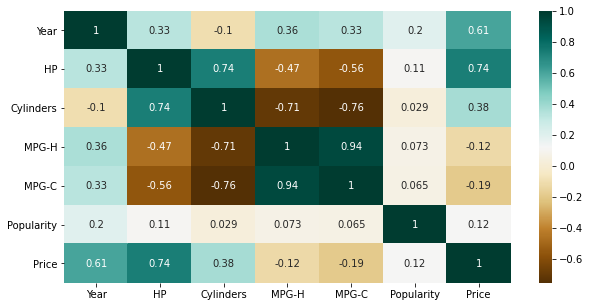

In [825]:
#HEAT Map
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

High Correlation

1.Between Cylinders and HP
2.Between highway mpg and City mpg


High Anti-correlation
 1.Cylinders and Highway mpg


-> Scatter Plot: It is used to find the correlation between the two variables.
  here,also plotted between the HP and Price which are given below

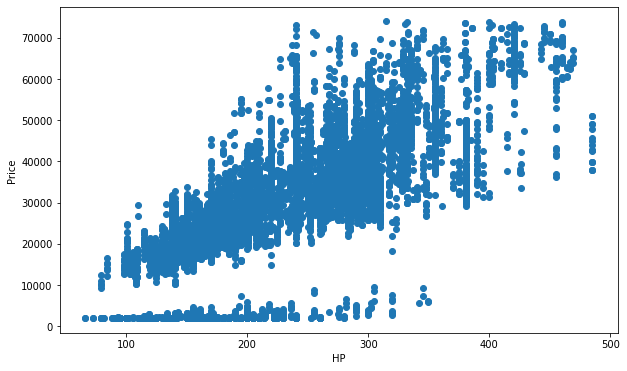

In [826]:
#scatter plot
fig,ax= plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**TASK 8**

Performing EDA and plotting different graphs 

Text(0.5, 0, 'Body type')

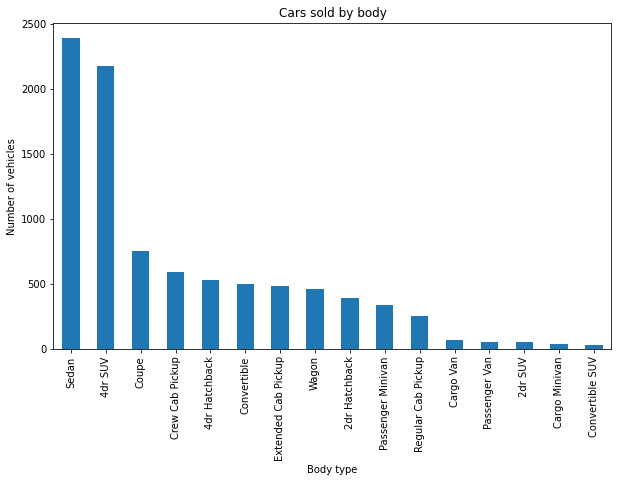

In [827]:
#vehicle style segment of those cars which sold the most
df['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.ylabel('Number of vehicles')
plt.xlabel('Body type')

Here, we can see that Sedan Cars were the most sold cars followed by 4dr SUV

Text(0.5, 0, 'Count of veicles')

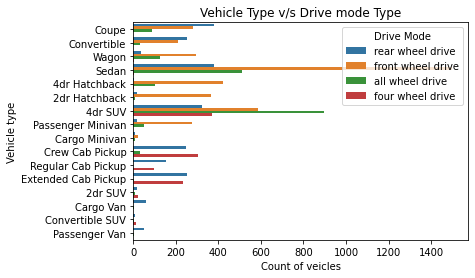

In [828]:
#Vehicle Style type and Drive type and analysis
sns.countplot(y='Vehicle Style',data=df,hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type" )
plt.ylabel('Vehicle type')
plt.xlabel('Count of veicles')

In [829]:
#creating a new column 'Price_group 'and assign the values based on car price
df['Price_group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20k','20-39k','40-59k','<60-79k','80-99k','>100'], include_lowest=True)
df['Price_group'] = df['Price_group'].astype(object)


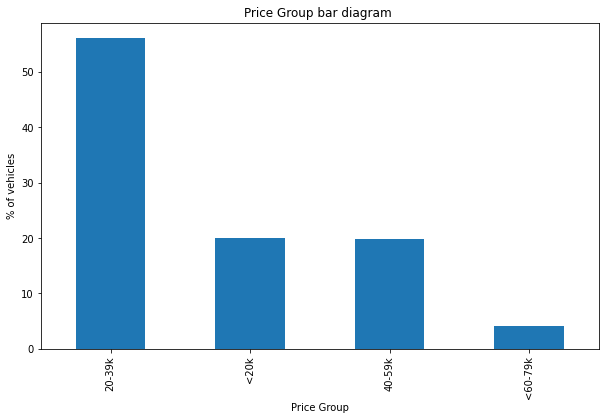

In [830]:
#graph between % of vehicles and Price Group
(df['Price_group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram ")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

**TASK 9**

-> Splitting the dataset and  making a machine learning model with
Price as the target variable

In [831]:
x= df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y=df['Price'].values

In [832]:
#fit the polynomial regression to the dataset
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
x= sc_x.fit_transform(x)
y= sc_y.fit_transform(y.reshape(-1,1))

In [833]:
# spliting the dataset into 80% of the data to the training set while 20% of the data to test set using below code.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [834]:
#training model
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

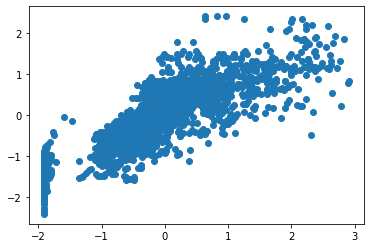

In [835]:
# we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:
y_pred= regressor.predict(x_test)
plt.scatter(y_test,y_pred)

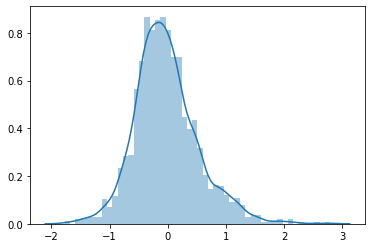

In [836]:
#Creating distplot with custom  bin size

sns.distplot((y_test-y_pred),bins=50)

In [837]:

# sklearn.metrics implements several loss, score, and utility functions to measure classification performance 
from sklearn import metrics

#The final step is to evaluate the performance of the algorithm.So, do this by finding the values for MAE, MSE, and RMSE. Execute the following script:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.41712611351514006
Root Mean Squared Error: 0.5480308494200454
R2 Score: 0.6887750950110387


**TASK 10**

-> checking the performance over metrics like R
square, RMSE, MAE etc 

In [838]:


from sklearn.preprocessing import PolynomialFeatures

#fit the polynomial regression to the datase
poly_reg = PolynomialFeatures(degree=4)
x_poly= poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg_2= LinearRegression()
lin_reg_2.fit(x_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

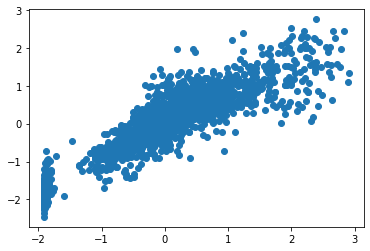

In [839]:
#Predicting the test set result
y_pred=lin_reg_2.predict(poly_reg.fit_transform(x_test))
plt.scatter(y_test,y_pred)

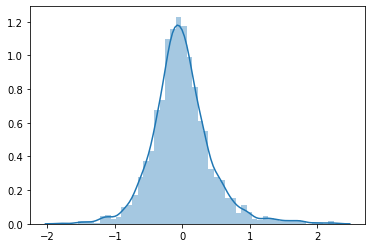

In [840]:
#Creating distplot with custom  bin size
sns.distplot((y_test-y_pred),bins=50)

In [841]:
#Checking the performance of above algorithm over matrices MAE, MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.31938914331363755
Root Mean Squared Error: 0.44056573990888637
R2 Score: 0.7988658687392769


In [842]:
#fitting SVR to data set
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

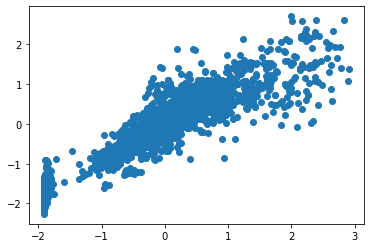

In [843]:
#Predicting the test set result
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

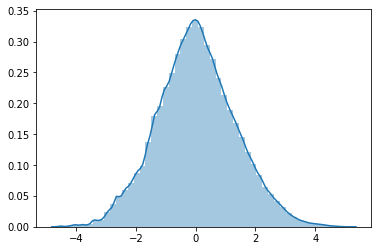

In [844]:
#Creating distplot with custom  bin size
sns.distplot((y_test-y_pred),bins=50)

In [845]:
#Checking the performance of above algorithm over matrices MAE, MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3024667191372598
Root Mean Squared Error: 0.43092923277395473
R2 Score: 0.80756846556696


In [846]:
#Fitting Random Forest Regressor to data set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

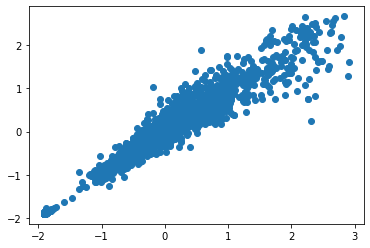

In [847]:
#Predicting the test set result
y_pred=regressor.predict(x_test)
plt.scatter(y_test,y_pred)

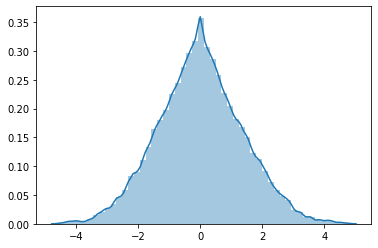

In [848]:
#Creating distplot with custom  bin size
sns.distplot((y_test-y_pred),bins=50)

In [849]:
#Checking the performance of above algorithm over matrices MAE, MSE, and RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17984799945110888
Root Mean Squared Error: 0.26631711282254455
R2 Score: 0.9265042072904047
